In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [105]:
# Load the dataset
df = pd.read_csv('seasonal_coconut_yield_data_2.csv', parse_dates=['Date'], index_col='Date')


In [106]:
df.head(2)

,Coconut Yield (kg)
Date,
2007-01-31,1783.516
2007-02-28,2243.735


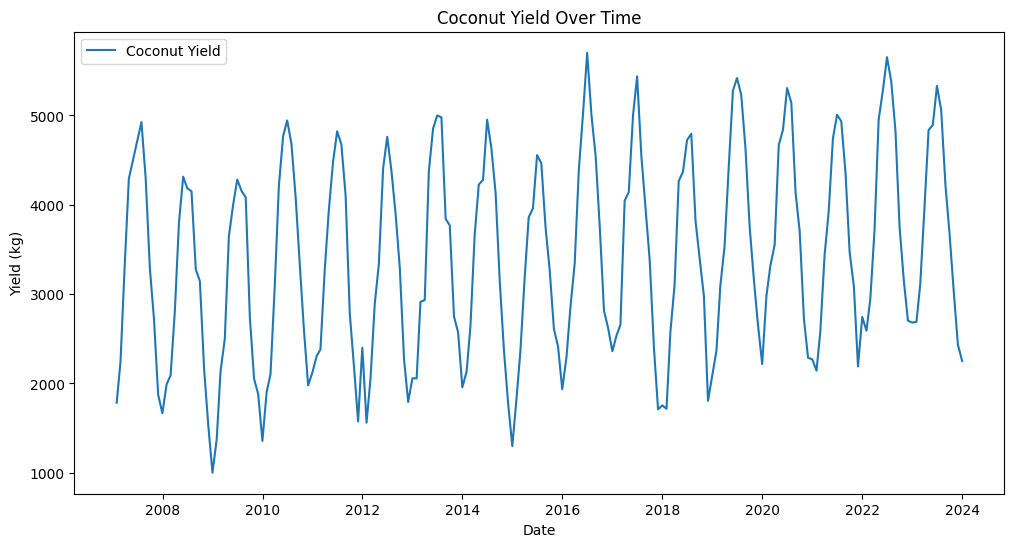

In [107]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Coconut Yield (kg)'], label='Coconut Yield')
plt.title('Coconut Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Yield (kg)')
plt.legend()
plt.show()

In [108]:
# Test for stationarity (ADF test)
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

In [109]:
test_stationarity(df['Coconut Yield (kg)'])

ADF Statistic: -3.4193783635655826
p-value: 0.01031573843508541


In [110]:
# Differencing to make the series stationary if needed
df['Coconut Yield (kg)'] = df['Coconut Yield (kg)'].diff().dropna()

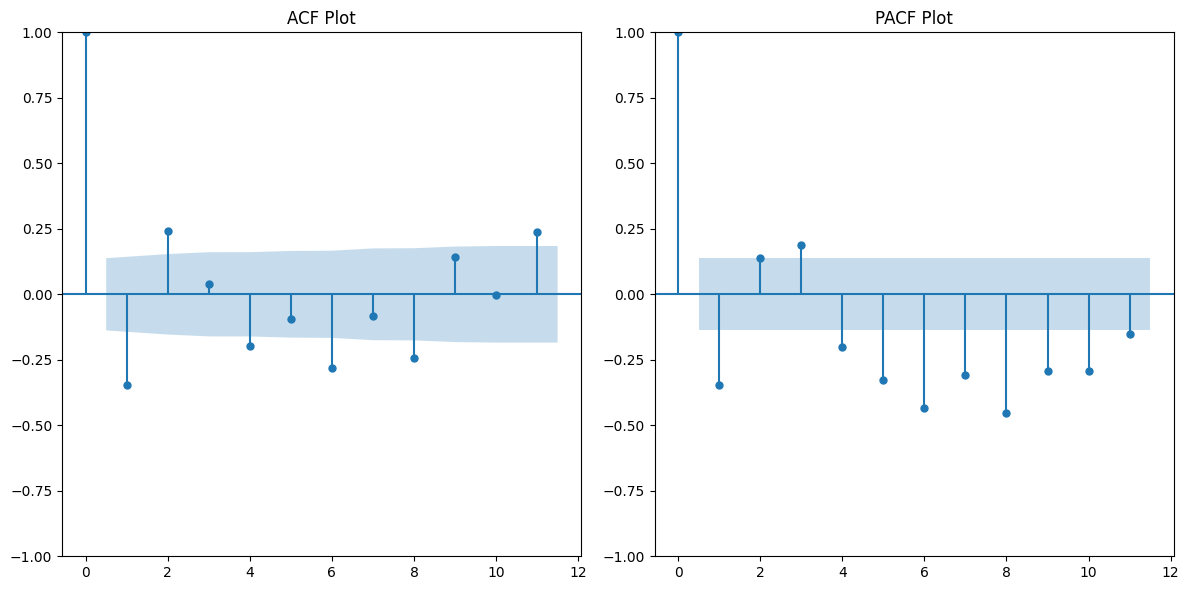

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'Coconut Yield (kg)' is your target series
# Use the first difference to make the series stationary if not done already
df['Yield_Diff'] = df['Coconut Yield (kg)'].diff().dropna()

# ACF and PACF plots
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['Yield_Diff'].dropna(), lags=11, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df['Yield_Diff'].dropna(), lags=11, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


In [112]:
# Train-test split
train_size = int(len(df) * 0.8)
train, test = df['Coconut Yield (kg)'][:train_size], df['Coconut Yield (kg)'][train_size:]


In [113]:
from pmdarima import auto_arima

# Drop NaN values from the train series
train = train.dropna()

# Automatically find the best ARIMA order
model = auto_arima(train, seasonal=False, stepwise=True, trace=True)

# Output the best order found
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2554.413, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2506.120, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2525.206, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2503.743, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2487.655, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2434.470, Time=0.03 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=2404.686, Time=0.05 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=2350.659, Time=0.22 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2358.208, Time=0.19 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=2360.422, Time=0.26 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=2354.756, Time=0.28 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0]          
Total fit time: 1.604 seconds
                               S

In [114]:
# Fit the ARIMA model
model = sm.tsa.ARIMA(train, order=(3, 0, 2))  # Adjust the order as necessary
model_fit = model.fit()

c:\Users\Thanuja Dhananjaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Thanuja Dhananjaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Thanuja Dhananjaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\Thanuja Dhananjaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

In [115]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Coconut Yield (kg)   No. Observations:                  162
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -1157.818
Date:                Sun, 03 Nov 2024   AIC                           2329.636
Time:                        16:57:14   BIC                           2351.249
Sample:                    02-28-2007   HQIC                          2338.411
                         - 07-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4193   8.19e-05  -6.62e+04      0.000      -5.419      -5.419
ar.L1          1.2995      0.009    149.539      0.000       1.282       1.316
ar.L2         -0.2519      0.015    -16.924      0.000      -0.281      -0.223
ar.L3         -0.4320      0.009    -50.338      0.000      -0.449      -0.415
ma.L1         -1.7300      0.144    -11.983      0.000      -2.013      -1.447
ma.L2          1.0000      0.169      5.932      0.000       0.670       1.330
sigma2      1.324e+05   2.14e-06   6.17e+10      0.000    1.32e+05    1.32e+05
===================================================================================
Ljung-Box (L1) (Q):                   7.67   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.01   Prob(JB):                         0.68
Heteroskedasticity (H):               1.26   Skew:                             0.00
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.26e+25. Standard errors may be unstable.
"""

In [116]:
# Forecasting
forecast = model_fit.forecast(steps=len(test))
test_index = test.index
forecast_series = pd.Series(forecast, index=test_index)

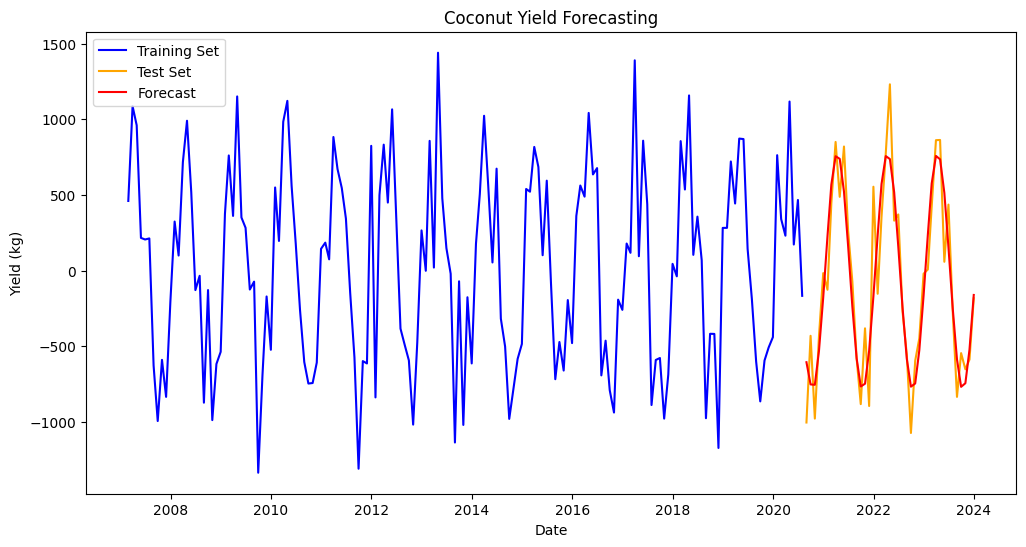

In [117]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Set', color='blue')
plt.plot(test.index, test, label='Test Set', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.title('Coconut Yield Forecasting')
plt.xlabel('Date')
plt.ylabel('Yield (kg)')
plt.legend()
plt.show()

In [118]:
# Model Evaluation
# Align the test and forecast series to ensure they have the same dates
test_clean, forecast_clean = test.align(forecast_series, join='inner')

mae = mean_absolute_error(test_clean, forecast_clean)
rmse = np.sqrt(mean_squared_error(test_clean, forecast_clean))
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 205.92662636030155
Root Mean Squared Error: 255.65076074635516
